In [1]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib numpy

In [2]:
import numpy as np
import os, time
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic  # Holistic Model
mp_drawing = mp.solutions.drawing_utils  # Drawing Utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    # Colour Conversion
    image.flags.writeable = False
    results = model.process(image)       # Model Makes Prediction
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)    # Colour Re-conversion
    return image, results

In [5]:
def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

# Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [6]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [7]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.6) as holistic:
    while cap.isOpened():
        # Capture Video
        ret, frame = cap.read()

        # Detect Keypoints
        image, results = mediapipe_detection(frame, holistic)
        #print(results)

        # Draw Landmarks
        draw_landmarks(image, results)
        
        # Show Video
        cv2.imshow('OpenCV Webcam', image)
        # Quit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [8]:
landmarks = results.left_hand_landmarks.landmark

print(landmarks)

len(landmarks)

[x: 0.8197046518325806
y: 0.46283626556396484
z: 2.6321058044231904e-07
, x: 0.7608803510665894
y: 0.4743990898132324
z: -0.012203458696603775
, x: 0.7113021016120911
y: 0.4598313868045807
z: -0.017117634415626526
, x: 0.6731820106506348
y: 0.441959023475647
z: -0.023383358493447304
, x: 0.6466866731643677
y: 0.42565950751304626
z: -0.029635349288582802
, x: 0.7222179174423218
y: 0.34867000579833984
z: 0.007899966090917587
, x: 0.6937764286994934
y: 0.289518803358078
z: -0.0020187885966151953
, x: 0.6772328019142151
y: 0.2522437274456024
z: -0.014609910547733307
, x: 0.6641317009925842
y: 0.2200503796339035
z: -0.023817887529730797
, x: 0.7443864345550537
y: 0.3207634389400482
z: 0.0033429774921387434
, x: 0.7142176032066345
y: 0.2511279284954071
z: -0.003463369095697999
, x: 0.6945395469665527
y: 0.20894192159175873
z: -0.01416853442788124
, x: 0.6785420179367065
y: 0.17552655935287476
z: -0.022140979766845703
, x: 0.7702077627182007
y: 0.3024207353591919
z: -0.005121103022247553
, x:

21

In [9]:
frame

array([[[ 64,  86, 114],
        [ 68,  91, 119],
        [ 67,  92, 113],
        ...,
        [177, 171, 170],
        [153, 148, 142],
        [160, 155, 149]],

       [[ 65,  93, 111],
        [ 68,  96, 114],
        [ 65,  93, 111],
        ...,
        [172, 159, 152],
        [172, 160, 150],
        [170, 157, 148]],

       [[ 49,  95,  87],
        [ 54,  99,  92],
        [ 52,  97,  94],
        ...,
        [172, 160, 150],
        [170, 160, 150],
        [169, 159, 149]],

       ...,

       [[191, 176, 138],
        [187, 173, 134],
        [192, 176, 133],
        ...,
        [139, 136, 105],
        [151, 134, 105],
        [152, 135, 106]],

       [[193, 167, 155],
        [200, 174, 162],
        [203, 181, 159],
        ...,
        [142, 129, 106],
        [140, 130, 104],
        [140, 130, 104]],

       [[193, 160, 157],
        [189, 156, 152],
        [192, 162, 151],
        ...,
        [142, 128, 107],
        [149, 129, 107],
        [150, 130, 108]]

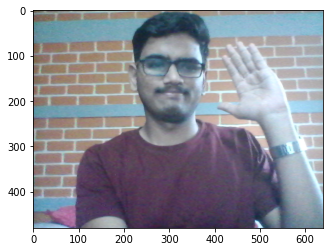

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame, results)

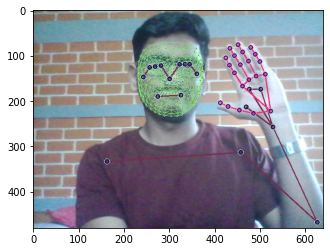

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Extract Keypoints

In [14]:
results.pose_landmarks

landmark {
  x: 0.4703422486782074
  y: 0.3158172369003296
  z: -0.9007973670959473
  visibility: 0.9999736547470093
}
landmark {
  x: 0.5057385563850403
  y: 0.24792546033859253
  z: -0.8159615397453308
  visibility: 0.9999439716339111
}
landmark {
  x: 0.523792564868927
  y: 0.24861735105514526
  z: -0.8155878782272339
  visibility: 0.9999415874481201
}
landmark {
  x: 0.5399905443191528
  y: 0.24996072053909302
  z: -0.8149967193603516
  visibility: 0.999930739402771
}
landmark {
  x: 0.44204631447792053
  y: 0.25555220246315
  z: -0.828877329826355
  visibility: 0.9999472498893738
}
landmark {
  x: 0.42154669761657715
  y: 0.2596636712551117
  z: -0.8280545473098755
  visibility: 0.999944269657135
}
landmark {
  x: 0.4019981026649475
  y: 0.2642366886138916
  z: -0.8281757235527039
  visibility: 0.9999427199363708
}
landmark {
  x: 0.5641556978225708
  y: 0.29251691699028015
  z: -0.37874099612236023
  visibility: 0.999927818775177
}
landmark {
  x: 0.379688024520874
  y: 0.3075760

In [15]:
pose_landmarks = []
for data in results.pose_landmarks.landmark:
    temp = np.array([data.x, data.y, data.z, data.visibility])
    pose_landmarks.append(temp)

In [16]:
temp

array([ 4.73163784e-01,  3.05935907e+00, -3.50790508e-02,  4.76064961e-05])

In [17]:
pose_landmarks

[array([ 0.47034225,  0.31581724, -0.90079737,  0.99997365]),
 array([ 0.50573856,  0.24792546, -0.81596154,  0.99994397]),
 array([ 0.52379256,  0.24861735, -0.81558788,  0.99994159]),
 array([ 0.53999054,  0.24996072, -0.81499672,  0.99993074]),
 array([ 0.44204631,  0.2555522 , -0.82887733,  0.99994725]),
 array([ 0.4215467 ,  0.25966367, -0.82805455,  0.99994427]),
 array([ 0.4019981 ,  0.26423669, -0.82817572,  0.99994272]),
 array([ 0.5641557 ,  0.29251692, -0.378741  ,  0.99992782]),
 array([ 0.37968802,  0.30757609, -0.42275167,  0.99996597]),
 array([ 0.50957501,  0.38976094, -0.74873954,  0.99996954]),
 array([ 0.42974582,  0.39714247, -0.76244003,  0.99997669]),
 array([ 0.71684772,  0.65412235, -0.18277091,  0.99970061]),
 array([ 0.25516576,  0.69523889, -0.20133027,  0.99898577]),
 array([ 0.97978622,  0.9738251 , -0.6028074 ,  0.96049291]),
 array([ 0.20149799,  1.083202  , -0.12476586,  0.44899258]),
 array([ 0.8278324 ,  0.53563678, -1.11137331,  0.97046584]),
 array([

In [18]:
dir(results)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 'count',
 'face_landmarks',
 'index',
 'left_hand_landmarks',
 'pose_landmarks',
 'pose_world_landmarks',
 'right_hand_landmarks',
 'segmentation_mask']

In [19]:
len(results.face_landmarks.landmark)

468

In [20]:
len(results.pose_landmarks.landmark)

33

In [21]:
len(results.left_hand_landmarks.landmark)

21

In [22]:
# Function to extract landmarks and convert to matrix
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [23]:
extract_keypoints(results)

array([ 0.47034225,  0.31581724, -0.90079737, ...,  0.        ,
        0.        ,  0.        ])

In [24]:
# 468 points & x,y,z
n_face = 468 * 3 

# 33 points & x,y,z,visibility
n_pose = 33 * 4

# 21 points & x,y,z
n_lh = 21 * 3
n_rh = 21 * 3

print(n_face + n_pose + n_lh + n_rh)

1662


In [25]:
# These are keypoints captured in 1 frame --> Flattened Into 1D Array of length 1662
print(len(extract_keypoints(results)))

1662


### Setup Folders For Data-Set

In [26]:
# Data created as numpy matrix will be stored here
DATA_PATH = os.path.join('Signs_Data')

# Actions to be detected
actions = np.array(['hello', 'namaste', 'thankyou'])

no_sequences = 30

sequence_length = 30

# Folder start
start_folder = 30

In [27]:
for action in actions:
    for video in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(video)))
        except:
            pass

### Collect Data

In [28]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [29]:
cap.release()
cv2.destroyAllWindows()

### Preprocess Data & Create Labels

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label : num for num, label in enumerate(actions) }

In [30]:
label_map

{'hello': 0, 'namaste': 1, 'thankyou': 2}

In [31]:
sequences, labels = [], []

for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), f'{frame_num}.npy'))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(90, 30, 1662)

In [33]:
X = np.array(sequences)

In [34]:
X

array([[[ 0.53792578,  0.36681488, -1.61581731, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.53742445,  0.36603341, -1.35335517, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.53740221,  0.36603484, -1.33491361, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.4411481 ,  0.34539229, -1.10086095, ...,  0.32801998,
          0.21418852, -0.03000153],
        [ 0.43769708,  0.34553567, -1.08807623, ...,  0.30202833,
          0.20333353, -0.01368129],
        [ 0.4406001 ,  0.34556341, -1.09352577, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.44179338,  0.34681135, -1.10221493, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.45058674,  0.34702995, -1.14301813, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.45981082,  0.3470524 , -1.24729824, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.44022146,  0.37879488, -1.12397265, ...,  

In [35]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [36]:
Y = to_categorical(labels).astype(int)

In [37]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.05)

In [39]:
X_train.shape

(85, 30, 1662)

In [40]:
X_test.shape

(5, 30, 1662)

### Build & Train the Model

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard 

In [42]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [43]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [44]:
res = [0.1,0.85,0.05]
    
actions[np.argmax(res)]

'namaste'

In [45]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [46]:
model.fit(X_train, Y_train, epochs=150, callbacks=[tb_callback])

Epoch 1/150
3/3 [==============================] - 4s 360ms/step - loss: 2.5325 - categorical_accuracy: 0.2975
Epoch 2/150
3/3 [==============================] - 0s 100ms/step - loss: 1.2623 - categorical_accuracy: 0.2603
Epoch 3/150
3/3 [==============================] - 0s 104ms/step - loss: 1.1363 - categorical_accuracy: 0.3072
Epoch 4/150
3/3 [==============================] - 0s 99ms/step - loss: 1.0405 - categorical_accuracy: 0.3523
Epoch 5/150
3/3 [==============================] - 0s 98ms/step - loss: 1.1166 - categorical_accuracy: 0.3837
Epoch 6/150
3/3 [==============================] - 0s 101ms/step - loss: 1.7642 - categorical_accuracy: 0.3249
Epoch 7/150
3/3 [==============================] - 0s 102ms/step - loss: 1.0604 - categorical_accuracy: 0.2877
Epoch 8/150
3/3 [==============================] - 0s 106ms/step - loss: 1.0149 - categorical_accuracy: 0.5656
Epoch 9/150
3/3 [==============================] - 0s 105ms/step - loss: 0.8944 - categorical_accuracy: 0.4756
Epo

3/3 [==============================] - 0s 97ms/step - loss: 0.0829 - categorical_accuracy: 0.9648
Epoch 148/150
3/3 [==============================] - 0s 96ms/step - loss: 0.1541 - categorical_accuracy: 0.9511
Epoch 149/150
3/3 [==============================] - 0s 95ms/step - loss: 0.0320 - categorical_accuracy: 1.0000
Epoch 150/150
3/3 [==============================] - 0s 93ms/step - loss: 1.5984 - categorical_accuracy: 0.9569


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

### Make Predictions

In [48]:
results = model.predict(X_test)

print(results)

[[8.0929548e-01 7.7679932e-02 1.1302460e-01]
 [8.5253296e-06 3.2448988e-02 9.6754253e-01]
 [2.2343052e-09 9.9994171e-01 5.8274756e-05]
 [9.0229678e-01 3.6556520e-02 6.1146714e-02]
 [6.7521158e-09 9.9977106e-01 2.2900113e-04]]


In [49]:
for res in results:
    print(actions[np.argmax(res)])

hello
thankyou
namaste
hello
namaste


In [50]:
Y_test

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

### Save Model 

In [51]:
model.save('ISL.h5')

# model.load_weights('ISL.h5')

### Logistic Regression

In [52]:
# from sklearn import linear_model
# from sklearn import metrics

# nsamples, nx, ny = X_train.shape
# X_train_2D = X_train.reshape((nsamples,nx*ny))


# n_records, n_values = Y_train.shape
# Y_train_1D = np.zeros(shape=(n_records,))
# for i in range(n_records):
#     for j in range(n_values):
#         if Y_train[i][j] == 1:
#             Y_train_1D[i] = j

# logistic_regression_model = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')

# logistic_regression_model.fit(X_train_2D, Y_train_1D)


In [53]:
# def return_1D(arr):
#     n_records, n_values = arr.shape
#     new_arr = np.zeros(shape=(n_records,))
#     for i in range(n_records):
#         for j in range(n_values):
#             if arr[i][j] == 1:
#                 arr[i] = j
#     return new_arr

# def return_2D(arr): 
#     nsamples, nx, ny = arr.shape
#     return arr.reshape((nsamples,nx*ny))

In [54]:
# X_test_2D = return_2D(X_test)
# Y_test_1D = return_1D(Y_test)

# logistic_regression_model.predict(X_test_2D)

In [55]:
# logistic_regression_model.score(X_test_2D, Y_test_1D)

In [56]:
# Y_test_1D

In [57]:
# Y_test

### Evaluations

In [58]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [59]:
yhat = model.predict(X_test)

In [60]:
ytrue = np.argmax(Y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [61]:
print(ytrue)
print(yhat)

[0, 1, 1, 0, 1]
[0, 2, 1, 0, 1]


In [62]:
# Draw confusion matrix
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [1, 2]],

       [[4, 1],
        [0, 0]]])

### Live Testing

In [69]:
# New detection variables
sequence = []
sentence = []
threshold = 0.7

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.6) as holistic:
    while cap.isOpened():
        # Capture Video
        ret, frame = cap.read()

        # Detect Keypoints
        image, results = mediapipe_detection(frame, holistic)
        #print(results)

        # Draw Landmarks
        draw_landmarks(image, results)
        
        # Prediction Logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
        
         #3. Viz logic
        if res[np.argmax(res)] > threshold: 
            if len(sentence) > 0: 
                if actions[np.argmax(res)] != sentence[-1]:
                    print(res, actions[np.argmax(res)])
                    sentence.append(actions[np.argmax(res)])
            else:
                print(res, actions[np.argmax(res)])
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5: 
            sentence = sentence[-5:]

            # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show Video
        cv2.imshow('OpenCV Webcam', image)
        # Quit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

[9.9665821e-01 6.7828258e-04 2.6634855e-03] hello
[0.17459016 0.04783424 0.77757555] thankyou
[0.72869426 0.05805866 0.21324709] hello
[0.1644102  0.1192112  0.71637857] thankyou
[9.7565237e-05 9.7579205e-01 2.4110403e-02] namaste
[2.4751286e-04 1.4699033e-01 8.5276216e-01] thankyou
[0.9064578  0.05820121 0.035341  ] hello


In [70]:
cap.release()
cv2.destroyAllWindows()